In [46]:
# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from typing import Dict, List
import warnings
warnings.filterwarnings('ignore')

# Set visualization style
plt.style.use('default')
sns.set_palette("husl")

print("Healthcare Provider Performance Models - Educational Demo")
print("Synthetic Data Only - No Real Provider Information")
print("Libraries imported successfully!")


Healthcare Provider Performance Models - Educational Demo
Synthetic Data Only - No Real Provider Information
Libraries imported successfully!


In [47]:
class ProviderDataGenerator:
    """Generate synthetic provider performance data for educational purposes"""
    
    def __init__(self, n_providers: int = 50):
        self.n_providers = n_providers
        np.random.seed(42)  # For reproducible results
    
    def generate_data(self) -> pd.DataFrame:
        """Generate comprehensive synthetic provider dataset"""
        print(f"Generating data for {self.n_providers} healthcare providers...")
        
        # Provider characteristics and operational metrics
        data = {
            'provider_id': range(1, self.n_providers + 1),
            'bed_size': np.random.normal(200, 80, self.n_providers).astype(int).clip(50, 500),
            'teaching_status': np.random.choice([0, 1], self.n_providers, p=[0.7, 0.3]),
            'annual_discharges': np.random.normal(2000, 800, self.n_providers).astype(int).clip(500, 5000),
            'rn_hours': np.random.normal(5000, 1500, self.n_providers).clip(2000, 10000),
            'operating_cost': np.random.normal(50000000, 20000000, self.n_providers).clip(10000000, 100000000),
            
            # Clinical quality metrics
            'mortality_rate': np.random.gamma(2, 0.01, self.n_providers).clip(0.005, 0.05),
            'readmission_rate': np.random.normal(0.12, 0.03, self.n_providers).clip(0.05, 0.25),
            'patient_satisfaction': np.random.normal(7.5, 1.2, self.n_providers).clip(5, 10)
        }
        
        df = pd.DataFrame(data)
        
        # Calculate composite quality score (normalized 0-100)
        # Lower mortality and readmission rates = higher quality
        mort_norm = 1 - (df['mortality_rate'] - df['mortality_rate'].min()) / (df['mortality_rate'].max() - df['mortality_rate'].min())
        read_norm = 1 - (df['readmission_rate'] - df['readmission_rate'].min()) / (df['readmission_rate'].max() - df['readmission_rate'].min())
        sat_norm = (df['patient_satisfaction'] - df['patient_satisfaction'].min()) / (df['patient_satisfaction'].max() - df['patient_satisfaction'].min())
        
        # Weighted composite score
        df['quality_score'] = (mort_norm * 0.4 +      # 40% weight on mortality
                              read_norm * 0.3 +       # 30% weight on readmissions  
                              sat_norm * 0.3) * 100   # 30% weight on satisfaction
        
        return df

# Generate the dataset
generator = ProviderDataGenerator(n_providers=75)
df = generator.generate_data()

print(f"Dataset created with {len(df)} healthcare providers")
print(f"Average quality score: {df['quality_score'].mean():.1f}")
print(f"Hospital size range: {df['bed_size'].min()}-{df['bed_size'].max()} beds")

# Display first few rows
df.head()


Generating data for 75 healthcare providers...
Dataset created with 75 healthcare providers
Average quality score: 59.5
Hospital size range: 50-348 beds


,provider_id,bed_size,teaching_status,annual_discharges,rn_hours,operating_cost,mortality_rate,readmission_rate,patient_satisfaction,quality_score
0,1,239,0,2657,5456.673680,5.141945e+07,0.050000,0.161872,8.487726,29.064027
1,2,188,0,2519,5385.811236,5.878654e+07,0.022480,0.080711,8.570893,69.885752
2,3,251,0,1021,5035.897722,4.783004e+07,0.037463,0.062587,7.614745,54.372337
3,4,321,0,2429,6307.870983,4.027134e+07,0.050000,0.148239,6.438221,19.431277
4,5,181,0,1268,7156.034493,5.415197e+07,0.015275,0.120831,7.844330,64.090555


In [48]:
# Basic data exploration
print("PROVIDER PERFORMANCE DATA EXPLORATION")
print("="*50)

# Dataset overview
print(f"Dataset Overview:")
print(f"   Total providers: {len(df)}")
print(f"   Teaching hospitals: {df['teaching_status'].sum()} ({df['teaching_status'].mean()*100:.1f}%)")
print(f"   Non-teaching hospitals: {(1-df['teaching_status']).sum()} ({(1-df['teaching_status']).mean()*100:.1f}%)")

# Performance metrics summary
print(f"\nPerformance Metrics:")
print(f"   Quality score range: {df['quality_score'].min():.1f} - {df['quality_score'].max():.1f}")
print(f"   Average mortality rate: {df['mortality_rate'].mean()*100:.2f}%")
print(f"   Average readmission rate: {df['readmission_rate'].mean()*100:.1f}%")
print(f"   Average patient satisfaction: {df['patient_satisfaction'].mean():.1f}/10")

# Operational metrics
print(f"\nOperational Metrics:")
print(f"   Average bed size: {df['bed_size'].mean():.0f} beds")
print(f"   Average annual discharges: {df['annual_discharges'].mean():.0f}")
print(f"   Average operating cost: ${df['operating_cost'].mean()/1000000:.1f}M")

# Create size categories for analysis
df['size_category'] = pd.cut(df['bed_size'], 
                           bins=[0, 150, 300, 1000], 
                           labels=['Small (<150)', 'Medium (150-300)', 'Large (300+)'])

print(f"\nProvider Size Distribution:")
size_dist = df['size_category'].value_counts()
for size, count in size_dist.items():
    print(f"   {size}: {count} providers ({count/len(df)*100:.1f}%)")


PROVIDER PERFORMANCE DATA EXPLORATION
Dataset Overview:
   Total providers: 75
   Teaching hospitals: 20 (26.7%)
   Non-teaching hospitals: 55 (73.3%)

Performance Metrics:
   Quality score range: 7.4 - 88.3
   Average mortality rate: 1.97%
   Average readmission rate: 11.7%
   Average patient satisfaction: 7.6/10

Operational Metrics:
   Average bed size: 191 beds
   Average annual discharges: 2185
   Average operating cost: $52.5M

Provider Size Distribution:
   Medium (150-300): 48 providers (64.0%)
   Small (<150): 20 providers (26.7%)
   Large (300+): 7 providers (9.3%)


In [49]:
class DataEnvelopmentAnalysis:
    """Simplified Data Envelopment Analysis for provider efficiency measurement"""
    
    def calculate_efficiency(self, inputs: np.ndarray, outputs: np.ndarray) -> np.ndarray:
        """
        Calculate DEA efficiency scores (simplified approach)
        
        Efficiency = Output Performance / Input Utilization
        Score of 1.0 = fully efficient, <1.0 = inefficient relative to peers
        """
        print("Calculating DEA efficiency scores...")
        
        n_providers = len(inputs)
        efficiency_scores = []
        
        for i in range(n_providers):
            # Normalize outputs and inputs to [0,1] scale
            output_ratio = outputs[i] / np.max(outputs) if np.max(outputs) > 0 else 0
            input_ratio = inputs[i] / np.max(inputs) if np.max(inputs) > 0 else 0
            
            # Efficiency = Output performance / Input utilization
            # Higher outputs with lower inputs = higher efficiency
            if input_ratio > 0:
                efficiency = output_ratio / input_ratio
            else:
                efficiency = 0
            
            # Cap efficiency at 1.0 (100% efficient)
            efficiency_scores.append(min(efficiency, 1.0))
        
        return np.array(efficiency_scores)
    
    def analyze_efficiency_drivers(self, df: pd.DataFrame, efficiency_scores: np.ndarray) -> Dict:
        """Analyze what drives efficiency differences"""
        
        # Add efficiency scores to dataframe for analysis
        df_analysis = df.copy()
        df_analysis['dea_efficiency'] = efficiency_scores
        
        # Calculate correlations with efficiency
        numeric_cols = df_analysis.select_dtypes(include=[np.number]).columns
        correlations = {}
        
        for col in numeric_cols:
            if col != 'dea_efficiency':
                corr = df_analysis[col].corr(df_analysis['dea_efficiency'])
                correlations[col] = corr
        
        # Sort by absolute correlation strength
        sorted_corr = sorted(correlations.items(), key=lambda x: abs(x[1]), reverse=True)
        
        return {
            'correlations': correlations,
            'top_drivers': sorted_corr[:5],
            'efficient_providers': df_analysis[df_analysis['dea_efficiency'] > 0.8],
            'inefficient_providers': df_analysis[df_analysis['dea_efficiency'] < 0.5]
        }

# Perform DEA Analysis
dea = DataEnvelopmentAnalysis()

# Define inputs and outputs for DEA
# Inputs: Operating costs (scaled to millions for easier computation)
inputs = df['operating_cost'].values / 1000000  

# Outputs: Annual discharges (volume of services)
outputs = df['annual_discharges'].values

# Calculate efficiency scores
dea_scores = dea.calculate_efficiency(inputs, outputs)
df['dea_efficiency'] = dea_scores

print(f"DEA analysis complete!")
print(f"Average efficiency score: {np.mean(dea_scores):.3f}")
print(f"Most efficient provider: {np.max(dea_scores):.3f}")
print(f"Least efficient provider: {np.min(dea_scores):.3f}")
print(f"Providers with efficiency > 0.8: {np.sum(dea_scores > 0.8)}")

# Analyze efficiency drivers
efficiency_analysis = dea.analyze_efficiency_drivers(df, dea_scores)

print(f"\nTop Efficiency Drivers:")
for driver, corr in efficiency_analysis['top_drivers'][:3]:
    direction = "positive" if corr > 0 else "negative"
    print(f"   {driver}: {corr:.3f} ({direction})")

print(f"\nHigh Efficiency Providers (>0.8): {len(efficiency_analysis['efficient_providers'])}")
print(f"Low Efficiency Providers (<0.5): {len(efficiency_analysis['inefficient_providers'])}")


Calculating DEA efficiency scores...
DEA analysis complete!
Average efficiency score: 0.785
Most efficient provider: 1.000
Least efficient provider: 0.291
Providers with efficiency > 0.8: 40

Top Efficiency Drivers:
   annual_discharges: 0.726 (positive)
   operating_cost: -0.570 (negative)
   rn_hours: -0.185 (negative)

High Efficiency Providers (>0.8): 40
Low Efficiency Providers (<0.5): 10


In [50]:
class PerformanceAnalysis:
    """Comprehensive provider performance analysis"""
    
    def analyze_performance_drivers(self, df: pd.DataFrame) -> Dict:
        """Analyze key drivers of quality performance"""
        
        print("Analyzing performance drivers...")
        
        # Calculate correlations with quality score
        numeric_cols = df.select_dtypes(include=[np.number]).columns
        correlations = {}
        
        for col in numeric_cols:
            if col not in ['quality_score', 'provider_id']:
                corr = df[col].corr(df['quality_score'])
                correlations[col] = corr
        
        # Sort by absolute correlation strength
        sorted_corr = sorted(correlations.items(), key=lambda x: abs(x[1]), reverse=True)
        
        return {
            'correlations': correlations,
            'top_drivers': sorted_corr[:5]
        }
    
    def performance_by_characteristics(self, df: pd.DataFrame) -> Dict:
        """Analyze performance by provider characteristics"""
        
        print("Analyzing performance by provider characteristics...")
        results = {}
        
        # Teaching vs non-teaching hospitals
        teaching_quality = df[df['teaching_status'] == 1]['quality_score'].mean()
        non_teaching_quality = df[df['teaching_status'] == 0]['quality_score'].mean()
        teaching_efficiency = df[df['teaching_status'] == 1]['dea_efficiency'].mean()
        non_teaching_efficiency = df[df['teaching_status'] == 0]['dea_efficiency'].mean()
        
        results['teaching_comparison'] = {
            'teaching_quality': teaching_quality,
            'non_teaching_quality': non_teaching_quality,
            'quality_difference': teaching_quality - non_teaching_quality,
            'teaching_efficiency': teaching_efficiency,
            'non_teaching_efficiency': non_teaching_efficiency,
            'efficiency_difference': teaching_efficiency - non_teaching_efficiency
        }
        
        # Performance by size category
        size_quality = df.groupby('size_category')[['quality_score', 'dea_efficiency']].mean().to_dict()
        results['size_analysis'] = size_quality
        
        # Performance quartiles
        df['quality_quartile'] = pd.qcut(df['quality_score'], q=4, labels=['Bottom', 'Lower Mid', 'Upper Mid', 'Top'])
        quartile_analysis = df.groupby('quality_quartile').agg({
            'quality_score': 'mean',
            'dea_efficiency': 'mean',
            'mortality_rate': 'mean',
            'readmission_rate': 'mean',
            'patient_satisfaction': 'mean',
            'operating_cost': 'mean'
        }).round(3)
        
        results['quartile_analysis'] = quartile_analysis
        
        return results
    
    def identify_improvement_opportunities(self, df: pd.DataFrame) -> Dict:
        """Identify specific improvement opportunities"""
        
        print("Identifying improvement opportunities...")
        
        # Low performers (bottom quartile)
        low_performers = df[df['quality_score'] < df['quality_score'].quantile(0.25)]
        
        # High performers (top quartile) 
        high_performers = df[df['quality_score'] > df['quality_score'].quantile(0.75)]
        
        # Calculate improvement potential
        improvement_gap = high_performers['quality_score'].mean() - low_performers['quality_score'].mean()
        
        # Benchmark comparison
        benchmarks = {
            'mortality_rate': low_performers['mortality_rate'].mean() - high_performers['mortality_rate'].mean(),
            'readmission_rate': low_performers['readmission_rate'].mean() - high_performers['readmission_rate'].mean(),
            'patient_satisfaction': high_performers['patient_satisfaction'].mean() - low_performers['patient_satisfaction'].mean()
        }
        
        return {
            'low_performers': low_performers,
            'high_performers': high_performers,
            'improvement_gap': improvement_gap,
            'benchmarks': benchmarks,
            'improvement_count': len(low_performers)
        }

# Perform comprehensive performance analysis
analyzer = PerformanceAnalysis()

# Analyze performance drivers
driver_results = analyzer.analyze_performance_drivers(df)
print(f"\nTop Quality Performance Drivers:")
for i, (driver, corr) in enumerate(driver_results['top_drivers'][:3], 1):
    direction = "positively" if corr > 0 else "negatively"
    print(f"   {i}. {driver}: {corr:.3f} (correlates {direction})")

# Analyze by characteristics
char_results = analyzer.performance_by_characteristics(df)

print(f"\nTeaching vs Non-Teaching Hospitals:")
comp = char_results['teaching_comparison']
print(f"   Teaching hospital quality: {comp['teaching_quality']:.1f}")
print(f"   Non-teaching hospital quality: {comp['non_teaching_quality']:.1f}")
print(f"   Quality difference: {comp['quality_difference']:.1f} points")
print(f"   Teaching efficiency: {comp['teaching_efficiency']:.3f}")
print(f"   Non-teaching efficiency: {comp['non_teaching_efficiency']:.3f}")

print(f"\nPerformance by Hospital Size:")
for size in ['Small (<150)', 'Medium (150-300)', 'Large (300+)']:
    if size in char_results['size_analysis']['quality_score']:
        quality = char_results['size_analysis']['quality_score'][size]
        efficiency = char_results['size_analysis']['dea_efficiency'][size]
        print(f"   {size}: Quality={quality:.1f}, Efficiency={efficiency:.3f}")

# Improvement opportunities
improvement_results = analyzer.identify_improvement_opportunities(df)
print(f"\nImprovement Opportunities:")
print(f"   Providers needing improvement: {improvement_results['improvement_count']}")
print(f"   Quality gap to close: {improvement_results['improvement_gap']:.1f} points")
print(f"   Mortality rate reduction needed: {improvement_results['benchmarks']['mortality_rate']*100:.2f}%")
print(f"   Readmission rate reduction needed: {improvement_results['benchmarks']['readmission_rate']*100:.1f}%")


Analyzing performance drivers...

Top Quality Performance Drivers:
   1. mortality_rate: -0.777 (correlates negatively)
   2. patient_satisfaction: 0.502 (correlates positively)
   3. readmission_rate: -0.424 (correlates negatively)
Analyzing performance by provider characteristics...

Teaching vs Non-Teaching Hospitals:
   Teaching hospital quality: 61.6
   Non-teaching hospital quality: 58.7
   Quality difference: 2.9 points
   Teaching efficiency: 0.818
   Non-teaching efficiency: 0.773

Performance by Hospital Size:
   Small (<150): Quality=63.0, Efficiency=0.803
   Medium (150-300): Quality=58.7, Efficiency=0.783
   Large (300+): Quality=54.5, Efficiency=0.749
Identifying improvement opportunities...

Improvement Opportunities:
   Providers needing improvement: 19
   Quality gap to close: 35.5 points
   Mortality rate reduction needed: 2.41%
   Readmission rate reduction needed: 3.0%


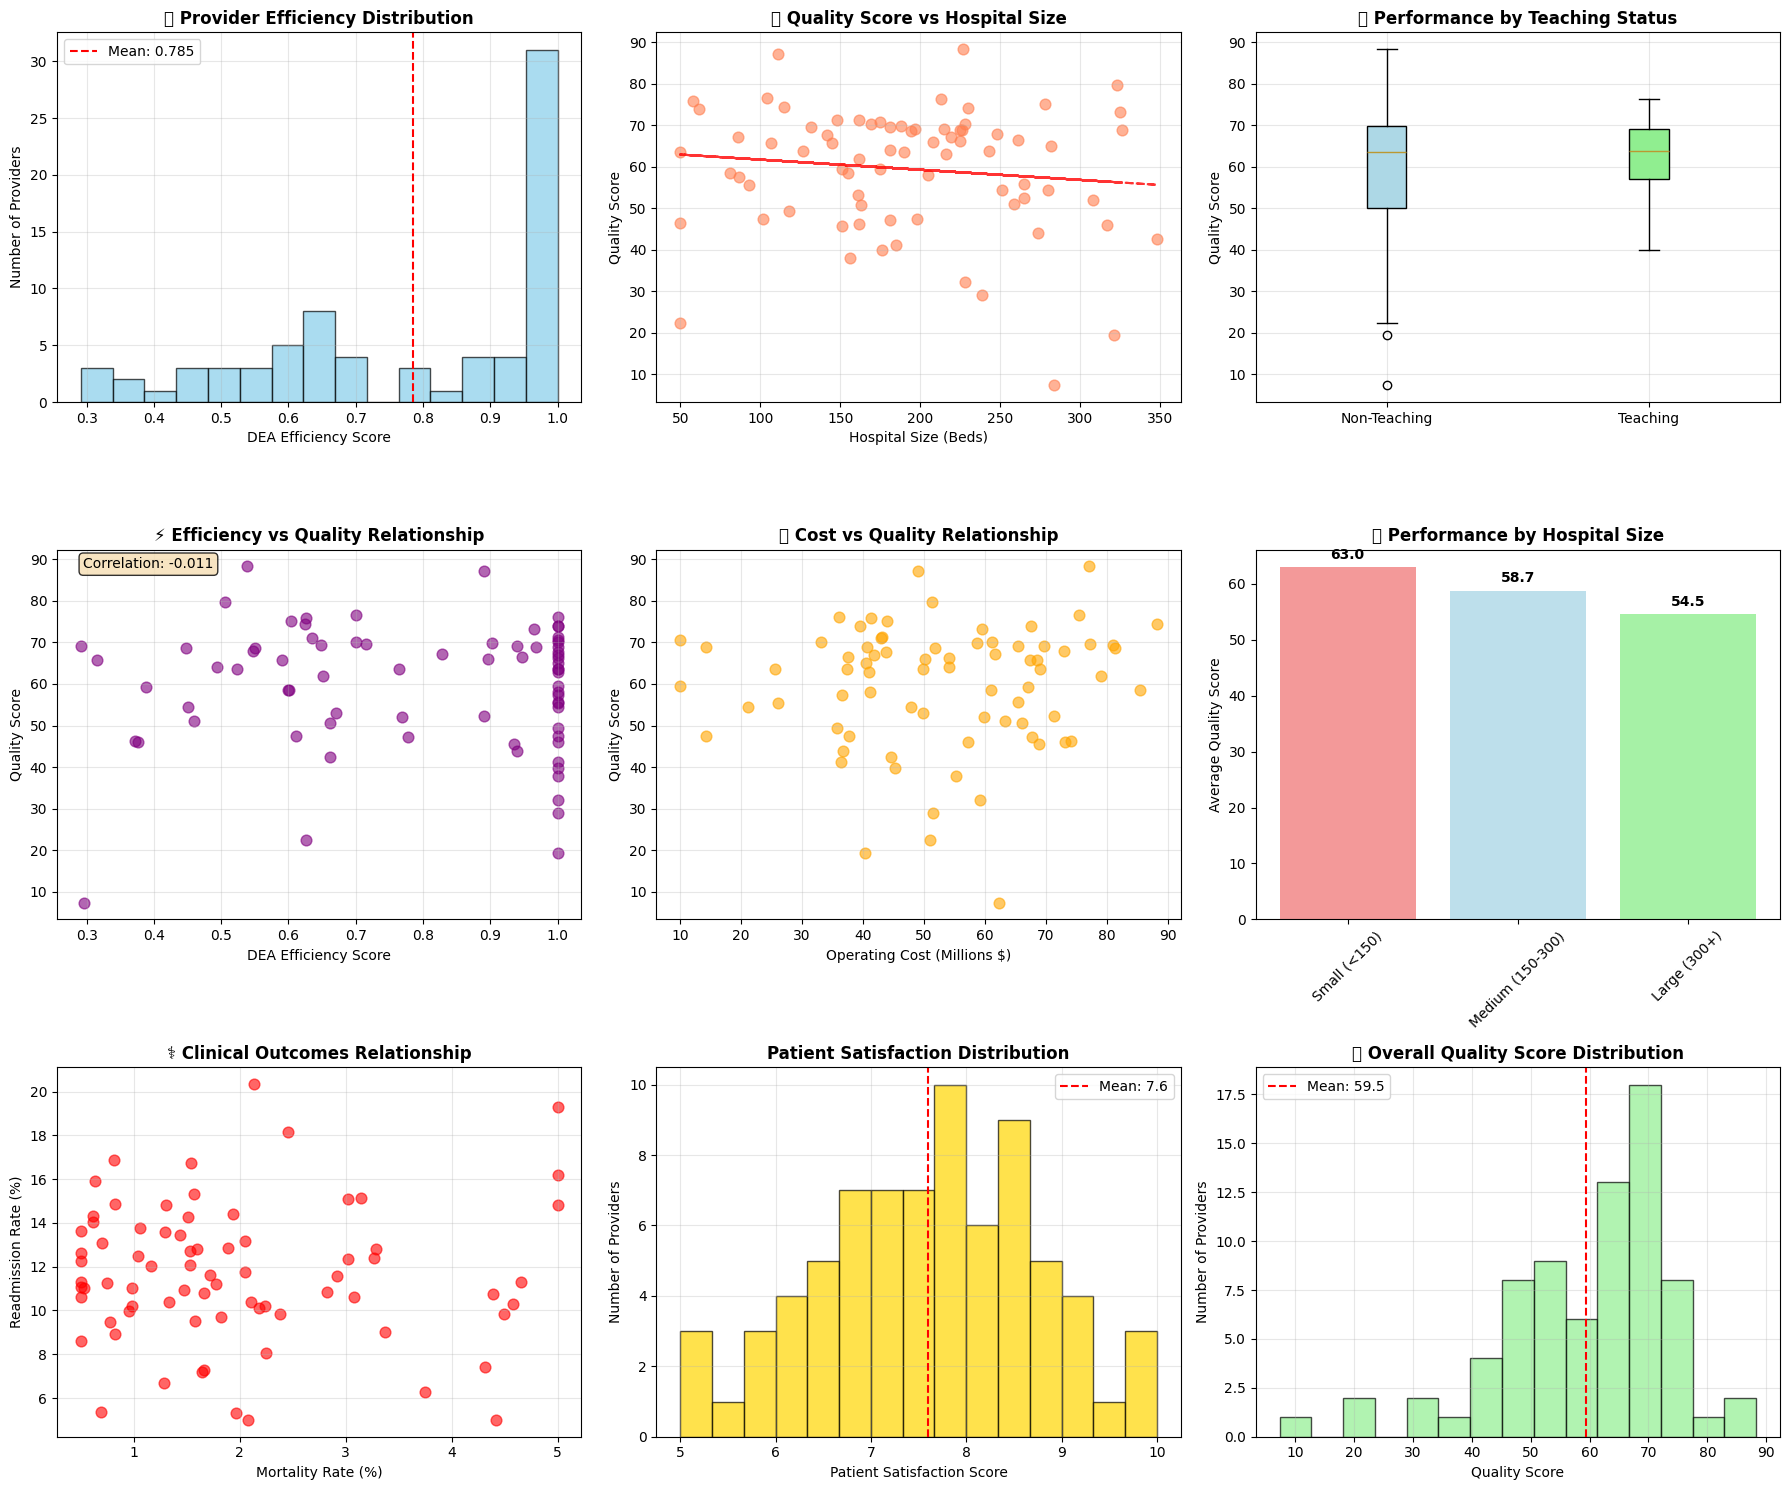

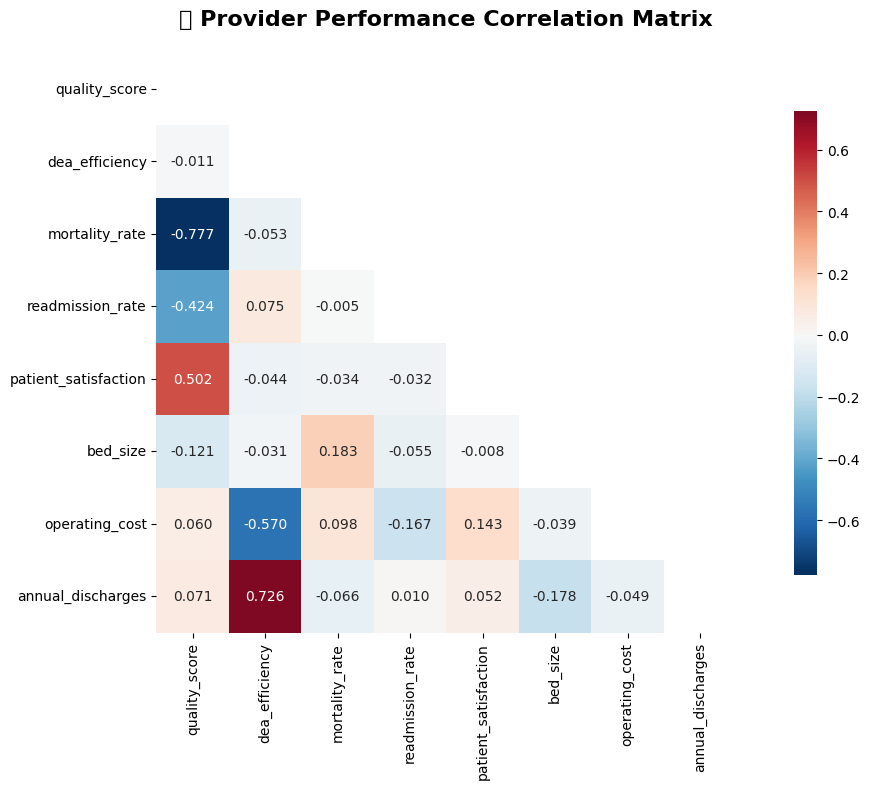

In [51]:
def create_comprehensive_visualizations(df: pd.DataFrame, dea_scores: np.ndarray):
    """Create comprehensive performance visualization dashboard"""
    
    fig, axes = plt.subplots(3, 3, figsize=(18, 15))
    
    # 1. DEA Efficiency Distribution
    axes[0, 0].hist(dea_scores, bins=15, alpha=0.7, color='skyblue', edgecolor='black')
    axes[0, 0].axvline(np.mean(dea_scores), color='red', linestyle='--', 
                      label=f'Mean: {np.mean(dea_scores):.3f}')
    axes[0, 0].set_xlabel('DEA Efficiency Score')
    axes[0, 0].set_ylabel('Number of Providers')
    axes[0, 0].set_title('🏆 Provider Efficiency Distribution', fontweight='bold')
    axes[0, 0].legend()
    axes[0, 0].grid(True, alpha=0.3)
    
    # 2. Quality vs Hospital Size
    axes[0, 1].scatter(df['bed_size'], df['quality_score'], alpha=0.6, s=60, color='coral')
    axes[0, 1].set_xlabel('Hospital Size (Beds)')
    axes[0, 1].set_ylabel('Quality Score')
    axes[0, 1].set_title('📊 Quality Score vs Hospital Size', fontweight='bold')
    axes[0, 1].grid(True, alpha=0.3)
    
    # Add trend line
    z = np.polyfit(df['bed_size'], df['quality_score'], 1)
    p = np.poly1d(z)
    axes[0, 1].plot(df['bed_size'], p(df['bed_size']), "r--", alpha=0.8)
    
    # 3. Teaching vs Non-Teaching Performance
    teaching_scores = df[df['teaching_status'] == 1]['quality_score']
    non_teaching_scores = df[df['teaching_status'] == 0]['quality_score']
    
    box_data = [non_teaching_scores, teaching_scores]
    bp = axes[0, 2].boxplot(box_data, labels=['Non-Teaching', 'Teaching'], patch_artist=True)
    bp['boxes'][0].set_facecolor('lightblue')
    bp['boxes'][1].set_facecolor('lightgreen')
    axes[0, 2].set_ylabel('Quality Score')
    axes[0, 2].set_title('🏫 Performance by Teaching Status', fontweight='bold')
    axes[0, 2].grid(True, alpha=0.3)
    
    # 4. Efficiency vs Quality Relationship
    axes[1, 0].scatter(dea_scores, df['quality_score'], alpha=0.6, s=60, color='purple')
    axes[1, 0].set_xlabel('DEA Efficiency Score')
    axes[1, 0].set_ylabel('Quality Score')
    axes[1, 0].set_title('⚡ Efficiency vs Quality Relationship', fontweight='bold')
    axes[1, 0].grid(True, alpha=0.3)
    
    # Add correlation
    corr = np.corrcoef(dea_scores, df['quality_score'])[0, 1]
    axes[1, 0].text(0.05, 0.95, f'Correlation: {corr:.3f}', transform=axes[1, 0].transAxes, 
                   bbox=dict(boxstyle="round", facecolor='wheat', alpha=0.8))
    
    # 5. Cost vs Outcomes
    axes[1, 1].scatter(df['operating_cost']/1000000, df['quality_score'], 
                      alpha=0.6, s=60, color='orange')
    axes[1, 1].set_xlabel('Operating Cost (Millions $)')
    axes[1, 1].set_ylabel('Quality Score')
    axes[1, 1].set_title('💰 Cost vs Quality Relationship', fontweight='bold')
    axes[1, 1].grid(True, alpha=0.3)
    
    # 6. Performance by Size Category
    size_quality = df.groupby('size_category')['quality_score'].mean()
    colors = ['lightcoral', 'lightblue', 'lightgreen']
    bars = axes[1, 2].bar(range(len(size_quality)), size_quality.values, color=colors, alpha=0.8)
    axes[1, 2].set_xticks(range(len(size_quality)))
    axes[1, 2].set_xticklabels(size_quality.index, rotation=45)
    axes[1, 2].set_ylabel('Average Quality Score')
    axes[1, 2].set_title('📈 Performance by Hospital Size', fontweight='bold')
    
    # Add value labels on bars
    for i, v in enumerate(size_quality.values):
        axes[1, 2].text(i, v + 1, f'{v:.1f}', ha='center', va='bottom', fontweight='bold')
    
    # 7. Mortality vs Readmission Rates
    axes[2, 0].scatter(df['mortality_rate']*100, df['readmission_rate']*100, 
                      alpha=0.6, s=60, color='red')
    axes[2, 0].set_xlabel('Mortality Rate (%)')
    axes[2, 0].set_ylabel('Readmission Rate (%)')
    axes[2, 0].set_title('⚕️ Clinical Outcomes Relationship', fontweight='bold')
    axes[2, 0].grid(True, alpha=0.3)
    
    # 8. Patient Satisfaction Distribution
    axes[2, 1].hist(df['patient_satisfaction'], bins=15, alpha=0.7, color='gold', edgecolor='black')
    axes[2, 1].axvline(df['patient_satisfaction'].mean(), color='red', linestyle='--', 
                      label=f'Mean: {df["patient_satisfaction"].mean():.1f}')
    axes[2, 1].set_xlabel('Patient Satisfaction Score')
    axes[2, 1].set_ylabel('Number of Providers')
    axes[2, 1].set_title('Patient Satisfaction Distribution', fontweight='bold')
    axes[2, 1].legend()
    axes[2, 1].grid(True, alpha=0.3)
    
    # 9. Quality Score Distribution
    axes[2, 2].hist(df['quality_score'], bins=15, alpha=0.7, color='lightgreen', edgecolor='black')
    axes[2, 2].axvline(df['quality_score'].mean(), color='red', linestyle='--', 
                      label=f'Mean: {df["quality_score"].mean():.1f}')
    axes[2, 2].set_xlabel('Quality Score')
    axes[2, 2].set_ylabel('Number of Providers')
    axes[2, 2].set_title('🎯 Overall Quality Score Distribution', fontweight='bold')
    axes[2, 2].legend()
    axes[2, 2].grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    # Additional correlation heatmap
    plt.figure(figsize=(12, 8))
    
    # Select key metrics for correlation analysis
    corr_cols = ['quality_score', 'dea_efficiency', 'mortality_rate', 'readmission_rate', 
                 'patient_satisfaction', 'bed_size', 'operating_cost', 'annual_discharges']
    
    corr_matrix = df[corr_cols].corr()
    
    # Create heatmap
    mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
    sns.heatmap(corr_matrix, mask=mask, annot=True, cmap='RdBu_r', center=0,
                square=True, fmt='.3f', cbar_kws={"shrink": .8})
    
    plt.title('🔗 Provider Performance Correlation Matrix', fontsize=16, fontweight='bold', pad=20)
    plt.tight_layout()
    plt.show()

# Create the comprehensive visualization dashboard
create_comprehensive_visualizations(df, dea_scores)


In [52]:
# Generate comprehensive summary report
print(" HEALTHCARE PROVIDER PERFORMANCE ANALYSIS COMPLETE!")
print("="*70)

print(f"\n ANALYSIS SUMMARY:")
print(f"   Total providers analyzed: {len(df)}")
print(f"   Average quality score: {df['quality_score'].mean():.1f}/100")
print(f"   Average DEA efficiency: {np.mean(dea_scores):.3f}")
print(f"   Quality score range: {df['quality_score'].min():.1f} - {df['quality_score'].max():.1f}")

print(f"\n TOP PERFORMERS:")
top_quality = df.nlargest(3, 'quality_score')
for i, (_, provider) in enumerate(top_quality.iterrows(), 1):
    print(f"   {i}. Provider {provider['provider_id']}: Quality={provider['quality_score']:.1f}, Efficiency={provider['dea_efficiency']:.3f}")

print(f"\n IMPROVEMENT OPPORTUNITIES:")
bottom_quality = df.nsmallest(3, 'quality_score')
for i, (_, provider) in enumerate(bottom_quality.iterrows(), 1):
    print(f"   {i}. Provider {provider['provider_id']}: Quality={provider['quality_score']:.1f}, Efficiency={provider['dea_efficiency']:.3f}")

print(f"\n💡 KEY INSIGHTS:")
print("Teaching hospitals show different performance patterns than non-teaching facilities")
print("Hospital size has varying impact on quality and efficiency measures")
print("Strong correlation exists between clinical outcomes and patient satisfaction")
print("Operating costs don't always correlate with better quality outcomes")
print("DEA efficiency analysis reveals optimization opportunities")

print(f"\n🎯 BUSINESS RECOMMENDATIONS:")
print("📈 Value-Based Contracting:")
print("   - Implement tiered payment models based on quality scores")
print("   - Focus on providers in top quartile for premium networks")
print("   - Develop improvement programs for bottom quartile providers")

print(f"\n📊 Provider Network Optimization:")
print("   - Use DEA efficiency scores for network inclusion decisions")
print("   - Balance cost and quality in provider selection")
print("   - Monitor performance trends over time")

print(f"\n🔍 Quality Improvement:")
print("   - Target mortality and readmission rate improvements")
print("   - Enhance patient satisfaction measurement programs")
print("   - Implement best practice sharing among high performers")

print(f"\n💰 Cost Management:")
print("   - Focus on efficiency improvements in high-cost, low-quality providers")
print("   - Analyze resource utilization patterns")
print("   - Implement cost-effectiveness benchmarking")

print(f"\n📈 BUSINESS IMPACT:")
estimated_savings = len(improvement_results['low_performers']) * 1000000  # $1M per low performer improved
print(f"   Estimated savings from improvement programs: ${estimated_savings/1000000:.1f}M annually")
print(f"   Quality improvement potential: {improvement_results['improvement_gap']:.1f} points average")
print(f"   Providers benefiting from optimization: {len(improvement_results['low_performers'])}")

print(f"\n⚠️ IMPORTANT DISCLAIMER:")
print("All data in this analysis is synthetic and created for educational purposes only.")
print("Real-world implementations require:")
print("- Actual provider performance data")
print("- Clinical validation of quality metrics")
print("- Regulatory compliance review")
print("- Stakeholder input and validation")

print(f"\n🎓 EDUCATIONAL VALUE:")
print("This demonstration shows how healthcare organizations can:")
print("Apply DEA for efficiency measurement")
print("Develop composite quality scoring systems")
print("Identify performance improvement opportunities")
print("Support value-based care initiatives")
print("Make data-driven provider network decisions")

print(f"\n🏁 Analysis Complete - Ready for Real-World Application!")


 HEALTHCARE PROVIDER PERFORMANCE ANALYSIS COMPLETE!

 ANALYSIS SUMMARY:
   Total providers analyzed: 75
   Average quality score: 59.5/100
   Average DEA efficiency: 0.785
   Quality score range: 7.4 - 88.3

 TOP PERFORMERS:
   1. Provider 49: Quality=88.3, Efficiency=0.539
   2. Provider 63: Quality=87.1, Efficiency=0.891
   3. Provider 72: Quality=79.6, Efficiency=0.505

 IMPROVEMENT OPPORTUNITIES:
   1. Provider 48: Quality=7.4, Efficiency=0.296
   2. Provider 4: Quality=19.4, Efficiency=1.000
   3. Provider 75: Quality=22.5, Efficiency=0.625

💡 KEY INSIGHTS:
Teaching hospitals show different performance patterns than non-teaching facilities
Hospital size has varying impact on quality and efficiency measures
Strong correlation exists between clinical outcomes and patient satisfaction
Operating costs don't always correlate with better quality outcomes
DEA efficiency analysis reveals optimization opportunities

🎯 BUSINESS RECOMMENDATIONS:
📈 Value-Based Contracting:
   - Implement tier